# 🎯Expert Recommendation Moddel

The primary goal of this model is to analyze a user's textual input (problem description) and classify it into one of several expert categories, including Legal, Fitness, Career, Health, Finance, and Relationships. By leveraging machine learning and natural language processing (NLP), this model automates the task of expert matching, thereby saving time and providing quick and accurate recommendations.

# 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle

# 2. Import Datasets and Understand Data

In [2]:
# Load dataset
df = pd.read_csv('Expert_Recommend.csv')

# Display basic information and the first few rows
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Expert               15000 non-null  object
 1   Problem Description  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB
None
                 Expert                                Problem Description
0  Nimal Perera (Legal)  I need help with legal. Can you provide some a...
1  Nimal Perera (Legal)  I need help with legal. Can you provide some a...
2  Nimal Perera (Legal)  I need help with contract. Can you provide som...
3  Nimal Perera (Legal)  I need help with contract. Can you provide som...
4  Nimal Perera (Legal)  I need help with court. Can you provide some a...
Expert                 0
Problem Description    0
dtype: int64


# 3. Data Cleaning

In [4]:
# Remove duplicates (if any)
df = df.drop_duplicates()

# Check and remove any missing data (if necessary)
df = df.dropna()

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Ensure data is cleaned
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Expert               105 non-null    object
 1   Problem Description  105 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB
None


# 4. Exploratory Data Analysis (EDA)

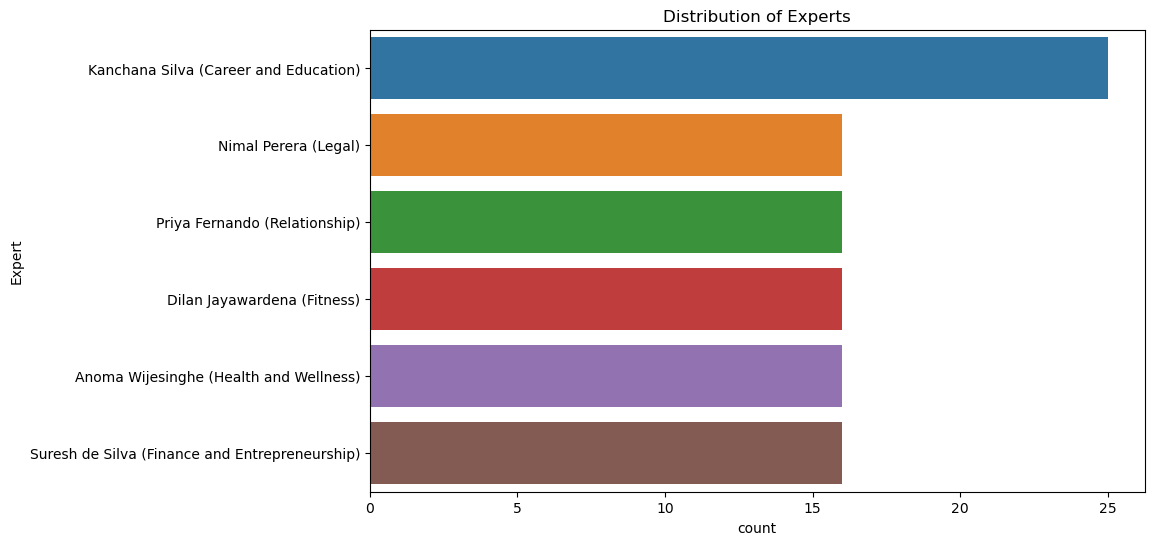

In [7]:
# Plot the distribution of experts
plt.figure(figsize=(10,6))
sns.countplot(y='Expert', data=df, order=df['Expert'].value_counts().index)
plt.title('Distribution of Experts')
plt.show()

In [8]:
# Length of problem descriptions
df['Description Length'] = df['Problem Description'].apply(len)

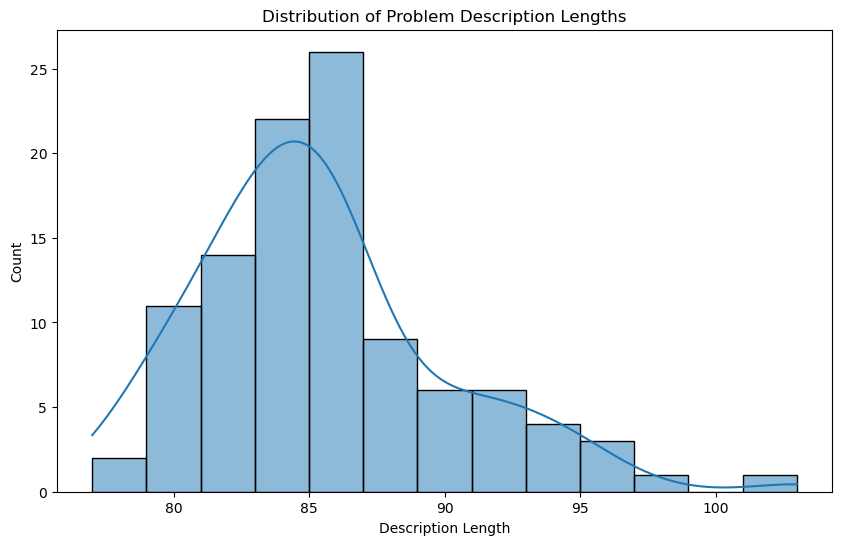

In [9]:
# Plot the distribution of problem description lengths
plt.figure(figsize=(10,6))
sns.histplot(df['Description Length'], kde=True)
plt.title('Distribution of Problem Description Lengths')
plt.show()

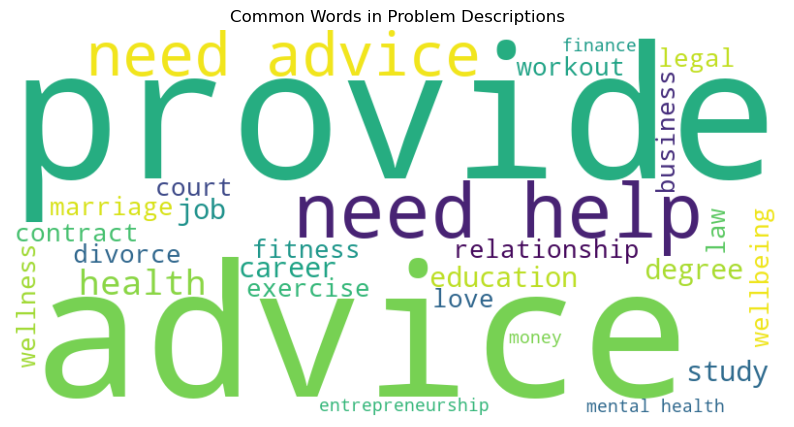

In [10]:
# Word cloud to visualize common words
from wordcloud import WordCloud

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Problem Description']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Problem Descriptions')
plt.show()

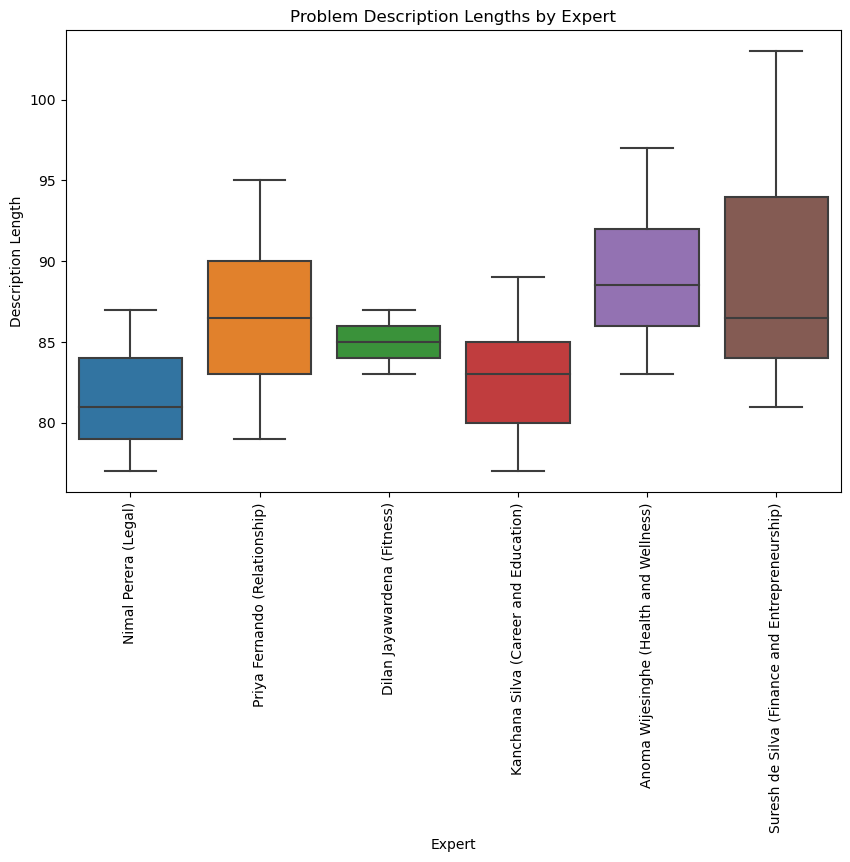

In [11]:
# Boxplot to check the variation in problem description lengths across experts
plt.figure(figsize=(10,6))
sns.boxplot(x='Expert', y='Description Length', data=df)
plt.xticks(rotation=90)
plt.title('Problem Description Lengths by Expert')
plt.show()

# 5. Data Processing

In [12]:
# Convert text data into numerical features using TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the problem descriptions into TF-IDF features
X = tfidf.fit_transform(df['Problem Description'])
y = df['Expert']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the train and test data
print(X_train.shape, X_test.shape)

(73, 24) (32, 24)


# 6. Model Creation and Evaluation

Accuracy: 1.0
Classification Report:
                                                 precision    recall  f1-score   support

        Anoma Wijesinghe (Health and Wellness)       1.00      1.00      1.00         5
                   Dilan Jayawardena (Fitness)       1.00      1.00      1.00         6
         Kanchana Silva (Career and Education)       1.00      1.00      1.00         5
                          Nimal Perera (Legal)       1.00      1.00      1.00         7
                 Priya Fernando (Relationship)       1.00      1.00      1.00         5
Suresh de Silva (Finance and Entrepreneurship)       1.00      1.00      1.00         4

                                      accuracy                           1.00        32
                                     macro avg       1.00      1.00      1.00        32
                                  weighted avg       1.00      1.00      1.00        32



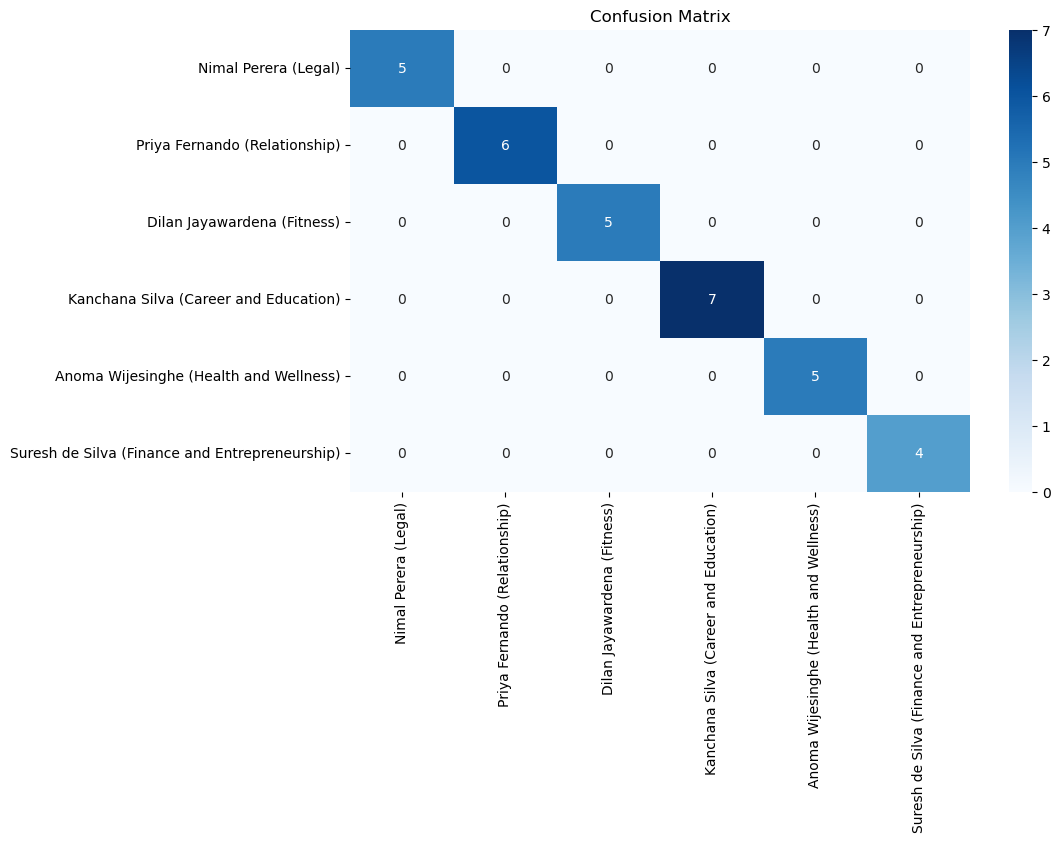

In [13]:
# Create a Naive Bayes model (MultinomialNB is well-suited for text classification)
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=df['Expert'].unique(), yticklabels=df['Expert'].unique())
plt.title('Confusion Matrix')
plt.show()

# 7. Hyperparameter Tuning

In [14]:
# Set up GridSearch for hyperparameter tuning
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0]}

# GridSearchCV to find the best alpha for the Naive Bayes model
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the optimized model
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))

Best Parameters: {'alpha': 0.01}
Optimized Accuracy: 1.0


# 8. Pickle File Creation

In [15]:
# Save the trained model using pickle
with open('expert_recommendation_model.pkl', 'wb') as f:
    pickle.dump(optimized_model, f)

# Save the TF-IDF vectorizer as well
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!


# 9. Sample Data Checking

In [16]:
# Load the model and vectorizer from the pickle file
with open('expert_recommendation_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_tfidf = pickle.load(f)

# Sample input from a user
sample_input = ["I need help with my marriage issues and divorce"]

# Transform the input using the loaded TF-IDF vectorizer
sample_input_transformed = loaded_tfidf.transform(sample_input)

# Make a prediction using the loaded model
predicted_expert = loaded_model.predict(sample_input_transformed)
print("Recommended Expert:", predicted_expert[0])

Recommended Expert: Priya Fernando (Relationship)
